In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [261]:
### importing file

df=pd.read_csv("C:\\Users\\d\\OneDrive\\Desktop\\machine learning\\assignment\\third assignment\\Electricity Consumption.csv")


In [262]:
df.head()

DATE  Electricty_Consumption_in_TW
0  1/1/1973                       35.9728
1  2/1/1973                       36.1334
2  3/1/1973                       35.0625
3  4/1/1973                       33.8416
4  5/1/1973                       33.5107

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          561 non-null    object 
 1   Electricty_Consumption_in_TW  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [264]:
df['DATE']=pd.to_datetime(df['DATE'])

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DATE                          561 non-null    datetime64[ns]
 1   Electricty_Consumption_in_TW  561 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.9 KB


In [266]:
df.set_index('DATE',inplace=True)

In [267]:
df.head()

Electricty_Consumption_in_TW
DATE                                    
1973-01-01                       35.9728
1973-02-01                       36.1334
1973-03-01                       35.0625
1973-04-01                       33.8416
1973-05-01                       33.5107

In [268]:
df.groupby('DATE').sum()

Electricty_Consumption_in_TW
DATE                                    
1973-01-01                       35.9728
1973-02-01                       36.1334
1973-03-01                       35.0625
1973-04-01                       33.8416
1973-05-01                       33.5107
...                                  ...
2019-05-01                       97.5860
2019-06-01                      110.8580
2019-07-01                      122.1014
2019-08-01                      121.7765
2019-09-01                      109.7190

[561 rows x 1 columns]

In [269]:
df.describe()

Electricty_Consumption_in_TW
count                    561.000000
mean                      76.681764
std                       22.756474
min                       33.510700
25%                       55.919700
50%                       78.417000
75%                       93.840600
max                      123.216300

<AxesSubplot:xlabel='DATE', ylabel='Electricty_Consumption_in_TW'>

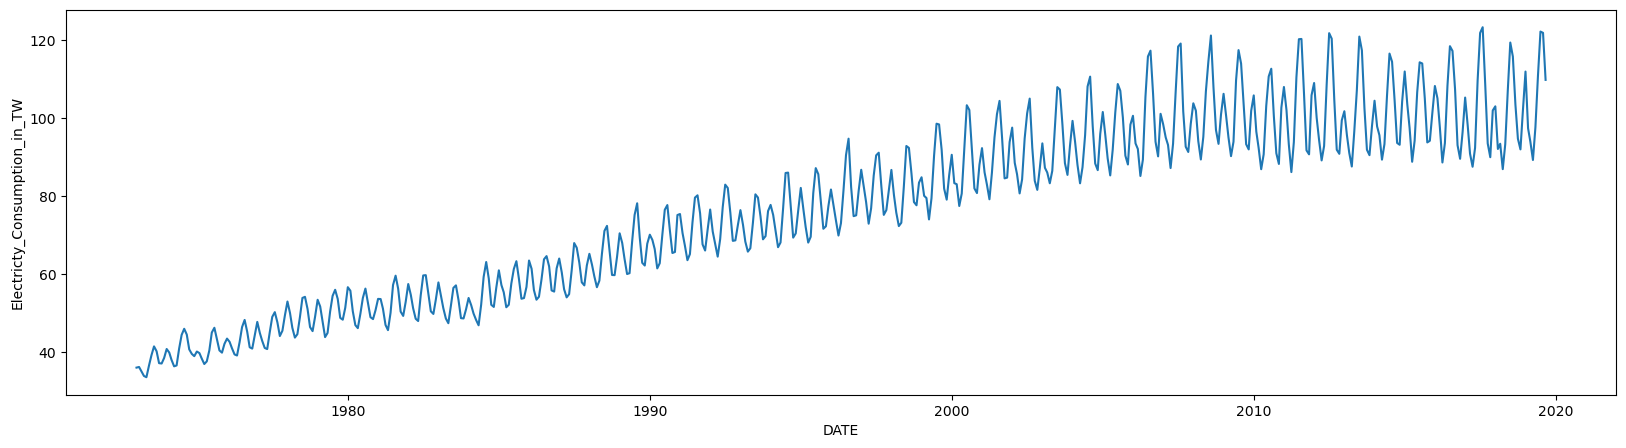

In [270]:
#### visualize the data

plt.figure(figsize=(20,5))
sns.lineplot(data=df,x=df.index,y=df.Electricty_Consumption_in_TW)


### in our data , trend can be seen wth variation in seasonality , so will use multiplicative decomposition

In [271]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

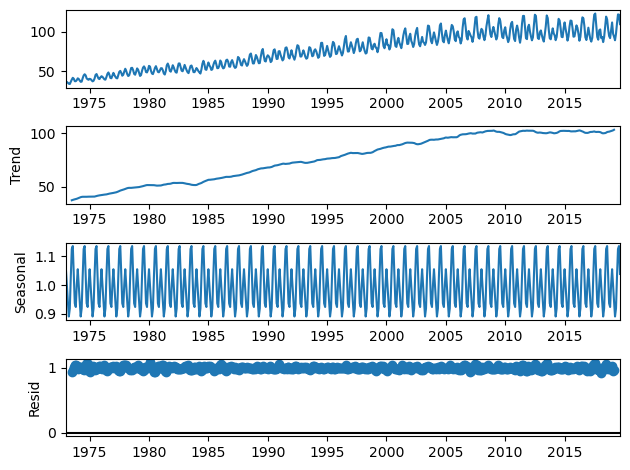

In [272]:
seasonal_decompose(df,model='multiplicative').plot();

In [273]:
### Stationarily test 

In [274]:
from statsmodels.tsa.stattools import adfuller

In [275]:
AD_SAT=adfuller(df['Electricty_Consumption_in_TW'])

In [276]:
AD_SAT

(-1.7405933729832572,
 0.4103281604468614,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 2295.409663118043)

In [277]:
### since p value (0.41032) is greater than 0.05 , so accept our null hypothesis that our data is not stationary

In [278]:
df['Electricty_Consumption_in_TW'].shift()

DATE
1973-01-01         NaN
1973-02-01     35.9728
1973-03-01     36.1334
1973-04-01     35.0625
1973-05-01     33.8416
                ...   
2019-05-01     89.1873
2019-06-01     97.5860
2019-07-01    110.8580
2019-08-01    122.1014
2019-09-01    121.7765
Name: Electricty_Consumption_in_TW, Length: 561, dtype: float64

In [279]:
df['shift_diff']=df['Electricty_Consumption_in_TW']-df['Electricty_Consumption_in_TW'].shift()

In [280]:
df.head()

Electricty_Consumption_in_TW  shift_diff
DATE                                                
1973-01-01                       35.9728         NaN
1973-02-01                       36.1334      0.1606
1973-03-01                       35.0625     -1.0709
1973-04-01                       33.8416     -1.2209
1973-05-01                       33.5107     -0.3309

<AxesSubplot:xlabel='DATE', ylabel='shift_diff'>

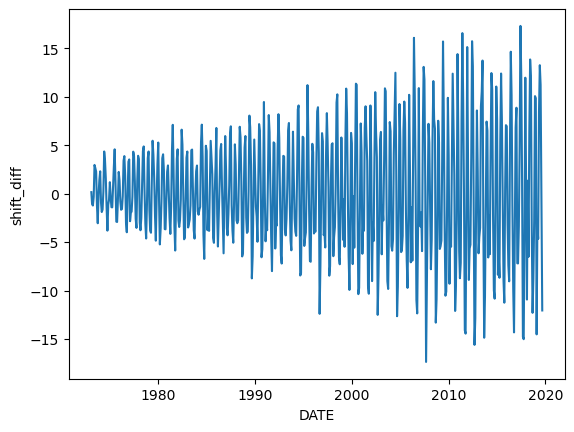

In [281]:
sns.lineplot(data=df,x=df.index,y=df.shift_diff)

In [282]:
AD_SAT2=adfuller(df['shift_diff'].dropna())

In [283]:
AD_SAT2

(-7.941665363981205,
 3.301343802151077e-12,
 14,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 2292.555416618966)

In [284]:
## Now our data is stationary

In [285]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


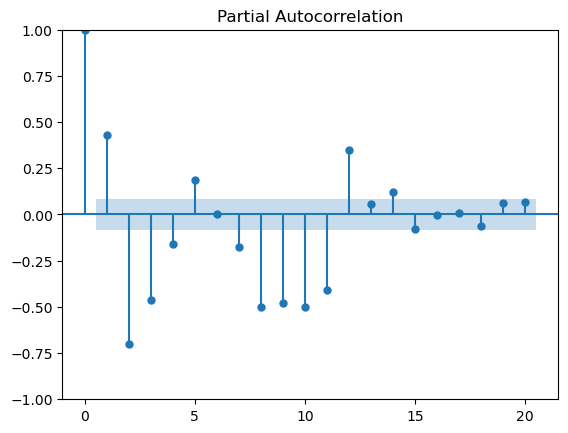

In [286]:
plot_pacf(df['shift_diff'].dropna(),lags=20);

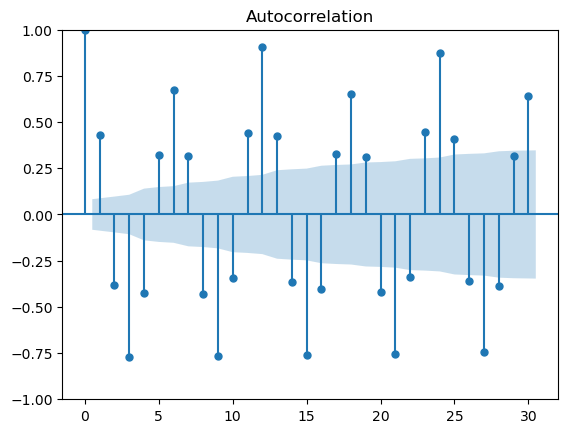

In [287]:
plot_acf(df['shift_diff'].dropna(),lags=30);

In [288]:
### p=2, q=3,d=1

In [289]:
round(len(df)*75/100)

421

In [290]:
train=df[0 :round(len(df)*75/100)]
test=df[round(len(df)*75/100):]

In [291]:
train.head()

Electricty_Consumption_in_TW  shift_diff
DATE                                                
1973-01-01                       35.9728         NaN
1973-02-01                       36.1334      0.1606
1973-03-01                       35.0625     -1.0709
1973-04-01                       33.8416     -1.2209
1973-05-01                       33.5107     -0.3309

In [292]:
test

Electricty_Consumption_in_TW  shift_diff
DATE                                                
2008-02-01                      101.8218     -1.8954
2008-03-01                       94.0200     -7.8018
2008-04-01                       89.3184     -4.7016
2008-05-01                       95.1251      5.8067
2008-06-01                      106.7553     11.6302
...                                  ...         ...
2019-05-01                       97.5860      8.3987
2019-06-01                      110.8580     13.2720
2019-07-01                      122.1014     11.2434
2019-08-01                      121.7765     -0.3249
2019-09-01                      109.7190    -12.0575

[140 rows x 2 columns]

In [293]:
train.shape,test.shape

((421, 2), (140, 2))

In [294]:
test.index[0]

Timestamp('2008-02-01 00:00:00')

In [295]:
### Holt Winters Model Implementation

In [296]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import numpy as np

In [297]:
model_ES=ExponentialSmoothing(train.Electricty_Consumption_in_TW,trend='additive',seasonal='multiplicative',seasonal_periods=12).fit()
model_ES_pred=model_ES.forecast(140)
model_ES_pred

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2008-02-01     97.922762
2008-03-01     95.053056
2008-04-01     89.443228
2008-05-01     95.049679
2008-06-01    107.626250
                 ...    
2019-05-01    115.842841
2019-06-01    131.131721
2019-07-01    143.281664
2019-08-01    143.368790
2019-09-01    127.529874
Freq: MS, Length: 140, dtype: float64

<AxesSubplot:xlabel='DATE', ylabel='Electricty_Consumption_in_TW'>

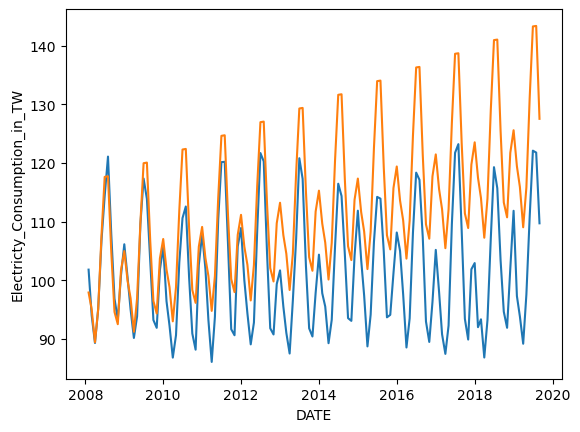

In [298]:
sns.lineplot(data=test,x=test.index,y=test['Electricty_Consumption_in_TW'])
sns.lineplot(data=test,x=test.index,y=model_ES_pred)


In [299]:
#### finding error

print('RMSE  : ', np.sqrt(mean_squared_error(test['Electricty_Consumption_in_TW'],model_ES_pred)))

print('MAPE  : ' ,mean_absolute_percentage_error(test['Electricty_Consumption_in_TW'],model_ES_pred))

RMSE  :  13.044427987607984
MAPE  :  0.11134009918230399


In [300]:
model_ES=ExponentialSmoothing(train.Electricty_Consumption_in_TW,trend='multiplicative',seasonal='additive',seasonal_periods=4).fit()
model_ES_pred=model_ES.forecast(140)
model_ES_pred

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2008-02-01    102.524569
2008-03-01    103.293648
2008-04-01    103.997653
2008-05-01    103.496558
2008-06-01    102.304052
                 ...    
2019-05-01     96.479405
2019-06-01     95.290729
2019-07-01     96.063758
2019-08-01     96.771710
2019-09-01     96.274560
Freq: MS, Length: 140, dtype: float64

In [301]:
print('RMSE  : ', np.sqrt(mean_squared_error(test['Electricty_Consumption_in_TW'],model_ES_pred)))

print('MAPE  : ' ,mean_absolute_percentage_error(test['Electricty_Consumption_in_TW'],model_ES_pred))

print('RMSPE : ' ,np.sqrt(mean_squared_error(test['Electricty_Consumption_in_TW'],model_ES_pred)/100))

RMSE  :  10.396835076556215
MAPE  :  0.08222552017434213
RMSPE :  1.0396835076556215


In [302]:
##### Building ARIMA model

In [303]:
model_arima=ARIMA(train['Electricty_Consumption_in_TW'],order=(2,1,3))
model_arima=model_arima.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [304]:
Arim_pred=model_arima.predict(start=test.index[0],end=test.index[-1])

In [305]:
Arim_pred

2008-02-01    100.809829
2008-03-01     91.442648
2008-04-01     84.710214
2008-05-01     87.342747
2008-06-01     96.701715
                 ...    
2019-05-01     87.762277
2019-06-01     96.764994
2019-07-01    103.068355
2019-08-01    100.371226
2019-09-01     91.376489
Freq: MS, Name: predicted_mean, Length: 140, dtype: float64

In [306]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [307]:
print('RMSE  : ', np.sqrt(mean_squared_error(test['Electricty_Consumption_in_TW'],Arim_pred)))

print('MAPE  : ' ,mean_absolute_percentage_error(test['Electricty_Consumption_in_TW'],Arim_pred))

print('RMSPE : ' ,np.sqrt(mean_squared_error(test['Electricty_Consumption_in_TW'],Arim_pred)/100))

RMSE  :  9.565269407923742
MAPE  :  0.07369203154880881
RMSPE :  0.9565269407923741


In [308]:
### p=2, q=6,d=1       

In [309]:
model_arima=ARIMA(train['Electricty_Consumption_in_TW'],order=(2,1,6))
model_arima=model_arima.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [310]:
Arim_pred=model_arima.predict(start=test.index[0],end=test.index[-1])

In [311]:
print('RMSE  : ', np.sqrt(mean_squared_error(test['Electricty_Consumption_in_TW'],Arim_pred)))

print('MAPE  : ' ,mean_absolute_percentage_error(test['Electricty_Consumption_in_TW'],Arim_pred))

print('RMSPE : ' ,np.sqrt(mean_squared_error(test['Electricty_Consumption_in_TW'],Arim_pred)/100))

RMSE  :  6.717784369921463
MAPE  :  0.048564023721403005
RMSPE :  0.6717784369921463


In [312]:
### p=2, q=9,d=1

In [313]:
model_arima=ARIMA(train['Electricty_Consumption_in_TW'],order=(2,1,9))
model_arima=model_arima.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [314]:
Arim_pred=model_arima.predict(start=test.index[0],end=test.index[-1])

In [315]:
print('RMSE  : ', np.sqrt(mean_squared_error(test['Electricty_Consumption_in_TW'],Arim_pred)))

print('MAPE  : ' ,mean_absolute_percentage_error(test['Electricty_Consumption_in_TW'],Arim_pred))

print('RMSPE : ' ,np.sqrt(mean_squared_error(test['Electricty_Consumption_in_TW'],Arim_pred)/100))

RMSE  :  7.506576473218933
MAPE  :  0.053262464104089365
RMSPE :  0.7506576473218933


In [316]:
### p=2, q=12,d=1

In [317]:
model_arima=ARIMA(train['Electricty_Consumption_in_TW'],order=(2,1,12))
model_arima=model_arima.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Ch

In [318]:
Arim_pred=model_arima.predict(start=test.index[0],end=test.index[-1])

In [319]:
print('RMSE  : ', np.sqrt(mean_squared_error(test['Electricty_Consumption_in_TW'],Arim_pred)))

print('MAPE  : ' ,mean_absolute_percentage_error(test['Electricty_Consumption_in_TW'],Arim_pred))

print('RMSPE : ' ,np.sqrt(mean_squared_error(test['Electricty_Consumption_in_TW'],Arim_pred)/100))

RMSE  :  6.683978520777487
MAPE  :  0.04831514080502668
RMSPE :  0.6683978520777487


In [320]:
### p=2, q=15,d=1
model_arima=ARIMA(train['Electricty_Consumption_in_TW'],order=(15,1,2))
model_arima=model_arima.fit()
Arim_pred=model_arima.predict(start=test.index[0],end=test.index[-1])

print('RMSE  : ', np.sqrt(mean_squared_error(test['Electricty_Consumption_in_TW'],Arim_pred)))

print('MAPE  : ' ,mean_absolute_percentage_error(test['Electricty_Consumption_in_TW'],Arim_pred))

print('RMSPE : ' ,np.sqrt(mean_squared_error(test['Electricty_Consumption_in_TW'],Arim_pred)/100))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


RMSE  :  4.310217702934643
MAPE  :  0.033850360402031376
RMSPE :  0.4310217702934643


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [321]:
### p=18, q=2,d=1    ### this combination has least error


model_arima=ARIMA(train['Electricty_Consumption_in_TW'],order=(18,1,2))
model_arima=model_arima.fit()
Arim_pred=model_arima.predict(start=test.index[0],end=test.index[-1])

print('RMSE  : ', np.sqrt(mean_squared_error(test['Electricty_Consumption_in_TW'],Arim_pred)))

print('MAPE  : ' ,mean_absolute_percentage_error(test['Electricty_Consumption_in_TW'],Arim_pred))

print('RMSPE : ' ,np.sqrt(mean_squared_error(test['Electricty_Consumption_in_TW'],Arim_pred)/100))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


RMSE  :  4.189208829962206
MAPE  :  0.03267033861663362
RMSPE :  0.41892088299622066


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [322]:
### p=2, q=21,d=1                                                           
model_arima=ARIMA(train['Electricty_Consumption_in_TW'],order=(21,1,2))
model_arima=model_arima.fit()
Arim_pred=model_arima.predict(start=test.index[0],end=test.index[-1])

print('RMSE  : ', np.sqrt(mean_squared_error(test['Electricty_Consumption_in_TW'],Arim_pred)))

print('MAPE  : ' ,mean_absolute_percentage_error(test['Electricty_Consumption_in_TW'],Arim_pred))

print('RMSPE : ' ,np.sqrt(mean_squared_error(test['Electricty_Consumption_in_TW'],Arim_pred)/100))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


RMSE  :  4.208512202426284
MAPE  :  0.03239398349941691
RMSPE :  0.4208512202426284


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='DATE', ylabel='Electricty_Consumption_in_TW'>

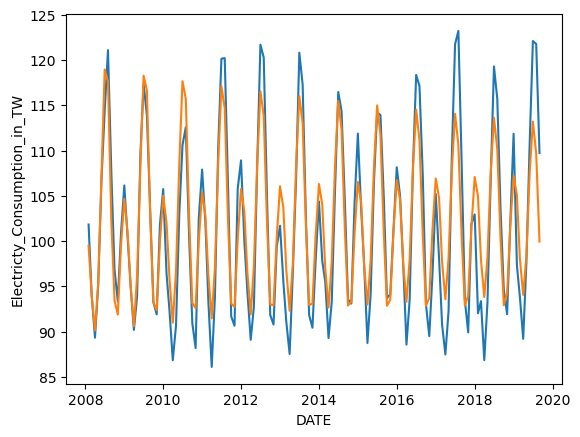

In [323]:
sns.lineplot(data=test,x=test.index,y=test['Electricty_Consumption_in_TW'])
sns.lineplot(data=test,x=test.index,y=Arim_pred)


In [324]:
### making SARIMAX model 

df.head()

Electricty_Consumption_in_TW  shift_diff
DATE                                                
1973-01-01                       35.9728         NaN
1973-02-01                       36.1334      0.1606
1973-03-01                       35.0625     -1.0709
1973-04-01                       33.8416     -1.2209
1973-05-01                       33.5107     -0.3309

In [325]:
df['diff_12']=df['Electricty_Consumption_in_TW']-df['Electricty_Consumption_in_TW'].shift(12)

In [326]:
df

Electricty_Consumption_in_TW  shift_diff  diff_12
DATE                                                         
1973-01-01                       35.9728         NaN      NaN
1973-02-01                       36.1334      0.1606      NaN
1973-03-01                       35.0625     -1.0709      NaN
1973-04-01                       33.8416     -1.2209      NaN
1973-05-01                       33.5107     -0.3309      NaN
...                                  ...         ...      ...
2019-05-01                       97.5860      8.3987   4.3499
2019-06-01                      110.8580     13.2720   3.7571
2019-07-01                      122.1014     11.2434   2.8140
2019-08-01                      121.7765     -0.3249   6.0657
2019-09-01                      109.7190    -12.0575   6.3120

[561 rows x 3 columns]

In [327]:
from statsmodels.tsa.statespace.sarimax import SARIMAX 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


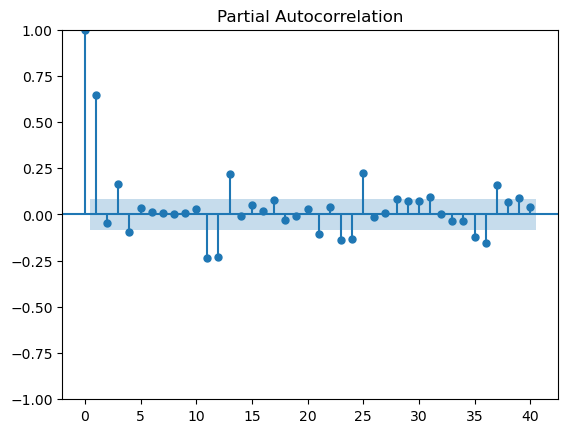

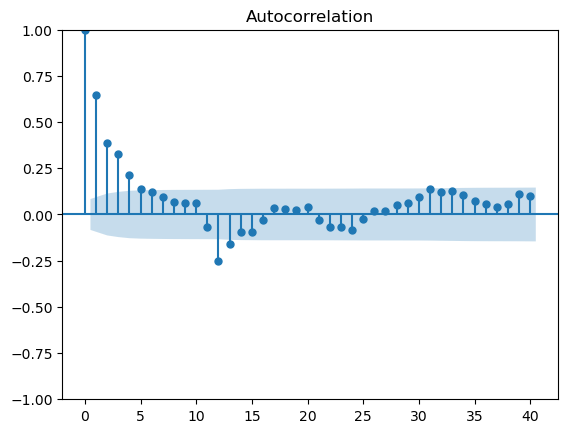

In [328]:
plot_pacf(df['diff_12'].dropna(),lags=40);
plot_acf(df['diff_12'].dropna(),lags=40);

In [329]:
### p=1,d=1,q=1

In [330]:
model_sarimax=SARIMAX(train['Electricty_Consumption_in_TW'],order=(1,1,0),seasonal_order=(1, 1, 0, 12))
model_sarimax=model_sarimax.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [331]:
Sarima_pred=model_sarimax.predict(start=test.index[0],end=test.index[-1])

In [332]:
print('RMSE  : ', np.sqrt(mean_squared_error(test['Electricty_Consumption_in_TW'],Sarima_pred)))

print('MAPE  : ' ,mean_absolute_percentage_error(test['Electricty_Consumption_in_TW'],Sarima_pred))

print('RMSPE : ' ,np.sqrt(mean_squared_error(test['Electricty_Consumption_in_TW'],Sarima_pred)/100))

RMSE  :  17.289262706847452
MAPE  :  0.14985086612220963
RMSPE :  1.728926270684745


In [333]:
### p=1,d=1,q=1

model_sarimax=SARIMAX(train['Electricty_Consumption_in_TW'],order=(1,1,1),seasonal_order=(1, 1, 1, 12))
model_sarimax=model_sarimax.fit()
Sarima_pred=model_sarimax.predict(start=test.index[0],end=test.index[-1])
np.sqrt(mean_squared_error(test['Electricty_Consumption_in_TW'],Sarima_pred))

print('RMSE  : ', np.sqrt(mean_squared_error(test['Electricty_Consumption_in_TW'],Sarima_pred)))

print('MAPE  : ' ,mean_absolute_percentage_error(test['Electricty_Consumption_in_TW'],Sarima_pred))

print('RMSPE : ' ,np.sqrt(mean_squared_error(test['Electricty_Consumption_in_TW'],Sarima_pred)/100))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RMSE  :  12.112901230345095
MAPE  :  0.10480708740791635
RMSPE :  1.2112901230345094


In [334]:
### p=1,d=1,q=1

model_sarimax=SARIMAX(train['Electricty_Consumption_in_TW'],order=(1,1,1),seasonal_order=(1, 1, 12, 12))
model_sarimax=model_sarimax.fit()
Sarima_pred=model_sarimax.predict(start=test.index[0],end=test.index[-1])

print('RMSE  : ', np.sqrt(mean_squared_error(test['Electricty_Consumption_in_TW'],Sarima_pred)))

print('MAPE  : ' ,mean_absolute_percentage_error(test['Electricty_Consumption_in_TW'],Sarima_pred))

print('RMSPE : ' ,np.sqrt(mean_squared_error(test['Electricty_Consumption_in_TW'],Sarima_pred)/100))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


RMSE  :  11.591277770560085
MAPE  :  0.0976957827550558
RMSPE :  1.1591277770560087


In [335]:
### so we can conclude that our ARIMA model fits well , and now we are doing future predictions for next 2 years 

model_arima=ARIMA(train['Electricty_Consumption_in_TW'],order=(18,1,2))
model_arima=model_arima.fit()
Arim_pred=model_arima.predict(start=test.index[0],end=test.index[-1])

print('RMSE  : ', np.sqrt(mean_squared_error(test['Electricty_Consumption_in_TW'],Arim_pred)))

print('MAPE  : ' ,mean_absolute_percentage_error(test['Electricty_Consumption_in_TW'],Arim_pred))

print('RMSPE : ' ,np.sqrt(mean_squared_error(test['Electricty_Consumption_in_TW'],Arim_pred)/100))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


RMSE  :  4.189208829962206
MAPE  :  0.03267033861663362
RMSPE :  0.41892088299622066


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [336]:
from pandas.tseries.offsets import DateOffset

In [340]:
future_dates=[df.index[-1] + DateOffset(months=x) for x in range (0,24)]

In [342]:
future_data=pd.DataFrame(index=future_dates,columns=df.columns)

In [343]:
future_data

Electricty_Consumption_in_TW shift_diff diff_12
2019-09-01                          NaN        NaN     NaN
2019-10-01                          NaN        NaN     NaN
2019-11-01                          NaN        NaN     NaN
2019-12-01                          NaN        NaN     NaN
2020-01-01                          NaN        NaN     NaN
2020-02-01                          NaN        NaN     NaN
2020-03-01                          NaN        NaN     NaN
2020-04-01                          NaN        NaN     NaN
2020-05-01                          NaN        NaN     NaN
2020-06-01                          NaN        NaN     NaN
2020-07-01                          NaN        NaN     NaN
2020-08-01                          NaN        NaN     NaN
2020-09-01                          NaN        NaN     NaN
2020-10-01                          NaN        NaN     NaN
2020-11-01                          NaN        NaN     NaN
2020-12-01                          NaN        NaN     NaN
2021-01-01                          NaN        NaN     NaN
2021-02-01                          NaN        NaN     NaN
2021-03-01                          NaN        NaN     NaN
2021-04-01                          NaN        NaN     NaN
2021-05-01                          NaN        NaN     NaN
2021-06-01                          NaN        NaN     NaN
2021-07-01                          NaN        NaN     NaN
2021-08-01                          NaN        NaN     NaN

In [345]:
df_future=pd.concat([df,future_data])

In [358]:
df_future.index[56]

Timestamp('2019-09-01 00:00:00')

In [361]:
df_future['forcast']=model_arima.predict(start=df_future.index[561],end=df_future.index[-1])

<AxesSubplot:>

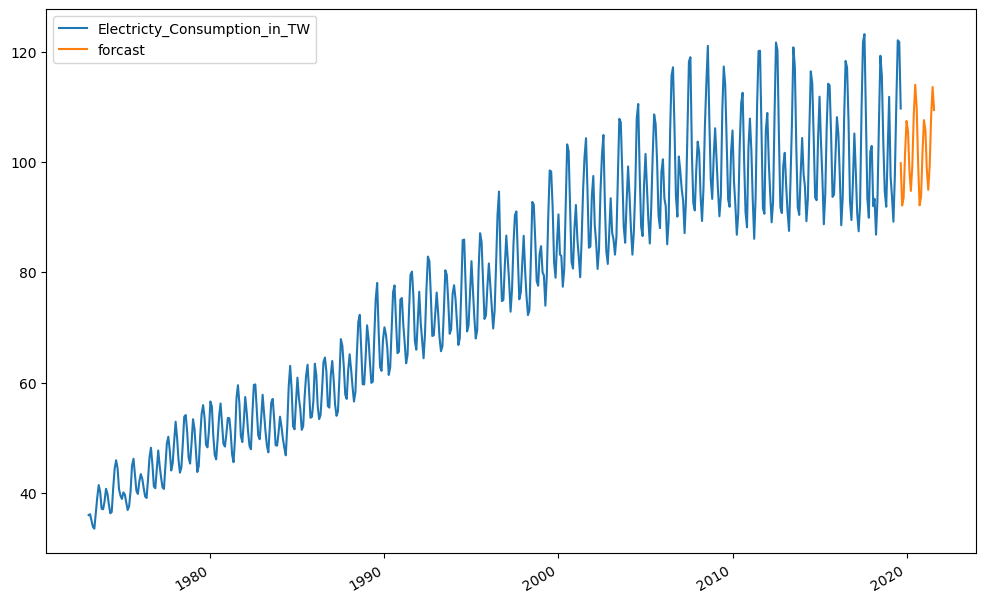

In [364]:
df_future[['Electricty_Consumption_in_TW','forcast']].plot(figsize=(12,8))